# Aim:
Implementation and training of the Perceptron model to solve the AND logical gate problem, demonstrating weight update mechanics.

In [55]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
#task 1

import numpy as np 
import tensorflow as tf
from tabulate import tabulate

#AND gate using perceptron 
x1= np.array([1,1,-1,-1])
x2=np.array([1,-1,1,-1])
bias= np.array([1,1,1,1])
y=np.array([1,-1,-1,-1])

#initializing to 0 
w1= tf.Variable(0.0)
w2= tf.Variable(0.0)
bias= tf.Variable(0.0)



# Perceptron function
def perceptron(x1, x2, w1, w2, bias):
    z = x1 * w1 + x2 * w2 + bias
    return tf.sign(z), z

learning_rate= 1.0

results= []

# Training loop
for epoch in range(2):  
    for i in range(len(x1)):
        output, net_input = perceptron(x1[i], x2[i], w1, w2, bias)
        error = y[i] - output
        
        delta_w1 = learning_rate* error * x1[i]
        delta_w2 = learning_rate* error *x2[i]
        delta_bias= learning_rate* error 

        w1.assign_add(delta_w1)
        w2.assign_add(delta_w2)
        bias.assign_add(delta_bias)

        results.append((
            epoch+1,
            x1[i],
            x2[i],
            net_input.numpy(),
            output.numpy(),
            delta_w1.numpy(),
            delta_w2.numpy(),
            delta_bias.numpy(),
            w1.numpy(),
            w2.numpy(),
            bias.numpy()
            
        ))


headers = ["Epoch", "x1","x2", "net input", "output",  "Δw1", "Δw2", "Δb", "w1", "w2", "bias"]
table =tabulate(results , headers, tablefmt= "pretty")
print(table)


print("\nFinal output:")
final_outputs=[]
for i in range(len (x1)):
    output, _ = perceptron(x1[i], x2[i], w1, w2, bias)
    final_outputs.append((
        x1[i],
        x2[i],
        output.numpy()
    )) 

final_table= tabulate(final_outputs, headers=["x1","x2", "Target"], tablefmt= "pretty"   )
print(final_table)

+-------+----+----+-----------+--------+------+------+------+------+-----+------+
| Epoch | x1 | x2 | net input | output | Δw1  | Δw2  |  Δb  |  w1  | w2  | bias |
+-------+----+----+-----------+--------+------+------+------+------+-----+------+
|   1   | 1  | 1  |    0.0    |  0.0   | 1.0  | 1.0  | 1.0  | 1.0  | 1.0 | 1.0  |
|   1   | 1  | -1 |    1.0    |  1.0   | -2.0 | 2.0  | -2.0 | -1.0 | 3.0 | -1.0 |
|   1   | -1 | 1  |    3.0    |  1.0   | 2.0  | -2.0 | -2.0 | 1.0  | 1.0 | -3.0 |
|   1   | -1 | -1 |   -5.0    |  -1.0  | -0.0 | -0.0 | 0.0  | 1.0  | 1.0 | -3.0 |
|   2   | 1  | 1  |   -1.0    |  -1.0  | 2.0  | 2.0  | 2.0  | 3.0  | 3.0 | -1.0 |
|   2   | 1  | -1 |   -1.0    |  -1.0  | 0.0  | -0.0 | 0.0  | 3.0  | 3.0 | -1.0 |
|   2   | -1 | 1  |   -1.0    |  -1.0  | -0.0 | 0.0  | 0.0  | 3.0  | 3.0 | -1.0 |
|   2   | -1 | -1 |   -7.0    |  -1.0  | -0.0 | -0.0 | 0.0  | 3.0  | 3.0 | -1.0 |
+-------+----+----+-----------+--------+------+------+------+------+-----+------+

Final output:
+

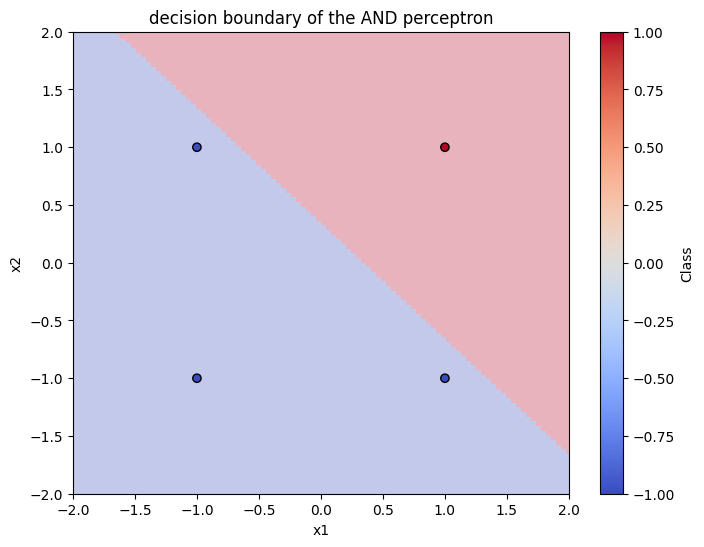

In [74]:
#task 2
import matplotlib.pyplot as plt 

x1_range= np.linspace(-2,2,100)
x2_range= np.linspace(-2,2,100)
X1, X2 = np.meshgrid(x1_range, x2_range)
X1_flat =x1.flatten()
X2_flat= x2.flatten()

z= np.array([perceptron(x1_val, x2_val, w1, w2, bias)[0].numpy()for x1_val, x2_val in zip(X1_flat, X2_flat)])
Z = Z.reshape(X1.shape)


plt.figure(figsize=(8,6))
plt.pcolormesh(X1, X2, Z, shading= 'auto', cmap='coolwarm', alpha=0.3)
plt.scatter(x1, x2, c=y, edgecolor='k',marker='o', cmap='coolwarm')
plt.title('decision boundary of the AND perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar(label='Class')
plt.show()




Inference: The decision boundary of an AND gate perceptron whcih classifies its input. The boundary separates regions which 1 (true) and -1 (false). Training points are marked to show how the perceptron classifies inputs using learned weights and the AND logic.

#task 3

#the limitations of single layer perceptron network:

The single layer perceptron algorithm is limited to learning linearly separable patterns, which can only classify data separated by a single hyperplane.
It is also limited by the number of plastic connections each neuron receives, which can restrict the number of classifiable activity patterns.
Single layer perceptrons struggle to represent multivariable functions, may require a large number of units or unstable output weights. 
They cannot represent complex mappings, and may not learn certain functions. They are also limited to binary outputs, only able to output 0 or 1, and are not suitable for complex nonlinear machine-learning problems. 
These limitations underscore the need for more complex models, such as multi-layer perceptrons, which can learn more complex patterns and relationships in data.

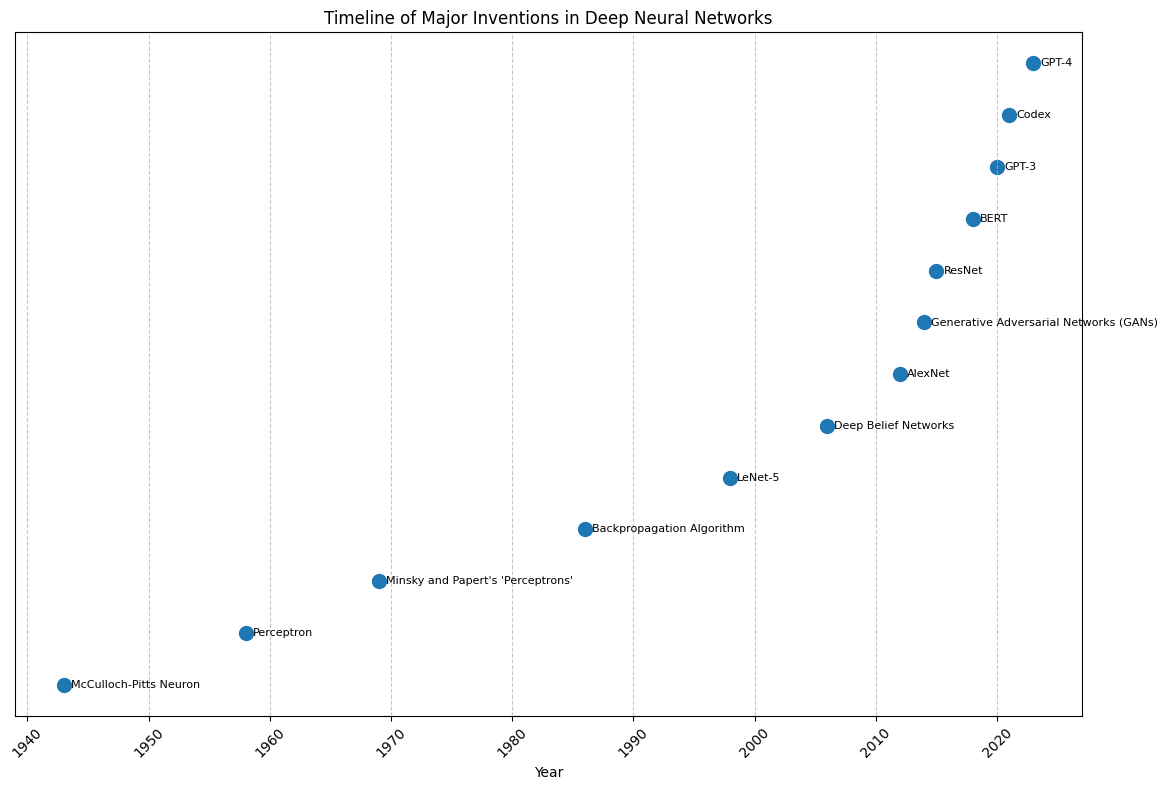

In [82]:
import matplotlib.pyplot as plt

years = [1943, 1958, 1969, 1986, 1998, 2006, 2012, 2014, 2015, 2018, 2020, 2021, 2023]
inventions = [
    "McCulloch-Pitts Neuron", "Perceptron", "Minsky and Papert's 'Perceptrons'",
    "Backpropagation Algorithm", "LeNet-5", "Deep Belief Networks", "AlexNet",
    "Generative Adversarial Networks (GANs)", "ResNet", "BERT", "GPT-3", "Codex", "GPT-4"
]

plt.figure(figsize=(12, 8))
plt.scatter(years, range(len(inventions)), s=100)

for i, (year, invention) in enumerate(zip(years, inventions)):
    plt.annotate(invention, (year, i), xytext=(5, 0), 
                 textcoords="offset points", va='center', fontsize=8)

plt.yticks([])
plt.xlabel('Year')
plt.title('Timeline of Major Inventions in Deep Neural Networks')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()